#**PERFORMANCE LB1**

In [107]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
from google.colab import files

###FUNZIONI

In [109]:
def get_preds(x,th):
  l_pred =[]
  for value in x:
    if value<=th:
      l_pred.append(1)
    else:
      l_pred.append(0)
  pred = np.array(l_pred)
  return pred

def print_cm(cm):
  TN, FP, FN, TP = cm.ravel()
  plt.figure(figsize=(3, 2))
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, annot_kws={"size": 7},
              xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
  plt.xlabel('Predetto')
  plt.ylabel('Vero')
  title = 'Confusion matrix with th='+str(th)
  plt.title(title+'\nTP={}, TN={}, FP={}, FN={}'.format(TP, TN, FP, FN))
  plt.show()
  return TN, FP, FN, TP

  def print_ROC_curve(FPR_list, TPR_list):
    plt.plot(FPR_list, TPR_list, linestyle='-', color='r', linewidth=3)
    plt.plot([0, 1], [0, 1], linestyle='--', color='cyan')
    max_TPR = max(TPR_list)
    max_TPR_index = TPR_list.index(max_TPR)
    plt.axhline(y=max_TPR, color='b', linestyle='--', label=f'Maximum TPR: {max_TPR:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.grid(True)
    plt.legend()
    plt.show()

# **SEQUENCE ALIGNMENT**

### CARICAMENTO DELL'OPTIMIZATION SET E CREAZIONE DEL DATAFRAME

In [110]:
#opt_set_seq = files.upload()
#scegliere set_1_seq.txt

In [111]:
#for file_name, content in opt_set_seq.items():
#  opt_df_seq = pd.read_csv('set_1_seq.txt', sep='\t', header=None, names=['ID_proteina', 'E-value', 'Etichetta'])

In [112]:
opt_df_seq = pd.read_csv('set_1_seq.txt', sep='\t', header=None, names=['ID_proteina', 'E-value', 'Etichetta'])

In [113]:
opt_df_seq.shape

(285624, 3)

### CARICAMENTO DEL TEST SET E CREAZIONE DEL DATAFRAME

In [114]:
#test_set_seq = files.upload()
#scegliere set_2_seq.txt

In [115]:
#for file_name, content in test_set_seq.items():
#  test_df_seq = pd.read_csv('set_2_seq.txt', sep='\t', header=None, names=['ID_proteina', 'E-value', 'Etichetta'])

In [116]:
test_df_seq = pd.read_csv('set_2_seq.txt', sep='\t', header=None, names=['ID_proteina', 'E-value', 'Etichetta'])

In [117]:
test_df_seq.shape

(285625, 3)

###CREAZIONE DELLA TABELLA RISULTATI

In [118]:
cols = ['Threshold','Accuracy','Pos_f1_score','Neg_f1_score','MCC']
seq_res_opt = pd.DataFrame(columns=cols)
seq_res_test = pd.DataFrame(columns=cols)

### OTTENIMENTO DELLE **PREDICTION DALL'OPTIMIZATION SET** E STUDIO DELLE PERFORMANCE

In [119]:
X_opt_seq = opt_df_seq['E-value'].to_numpy()
y_opt_seq = opt_df_seq['Etichetta'].to_numpy()

In [154]:
seqopt_TPR_list = []
seqopt_FPR_list = []

for th in [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.0000001, 0.00000001, 0.000000001, 0.0000000001, 0.00000000001, 0.000000000001, 0.0000000000001, 0.00000000000001, 0.000000000000001, 0.0000000000000001]:
  y_pred1_seq = get_preds(X_opt_seq,th)
  cm = confusion_matrix(y_opt_seq,y_pred1_seq)
  #print_cm(cm)
  report = classification_report(y_opt_seq, y_pred1_seq, output_dict=True)
  ac, pos_f1, neg_f1, mcc = report['accuracy'], report['1']['f1-score'], report['0']['f1-score'], matthews_corrcoef(y_opt_seq, y_pred1_seq)
  #print('THRESHOLD=%s\nAccuracy=%s\nPositive F1=%s\nNegative F1=%s\nMCC=%s\n'%(th,ac,pos_f1,neg_f1,mcc))
  new_res = [th, ac, pos_f1, neg_f1, mcc]
  seq_res_opt.loc[len(seq_res_opt)] = new_res
  seqopt_TPR_current = TP / (TP + FN)
  seqopt_FPR_current = FP / (FP + TN)
  seqopt_TPR_list.append(seqopt_TPR_current)
  seqopt_FPR_list.append(seqopt_FPR_current)


In [155]:
print(seq_res_opt)
#seq_res_df.to_excel('Risultati.xlsx',index=False)

       Threshold  Accuracy  Pos_f1_score  Neg_f1_score       MCC
0   1.000000e-04  0.999905      0.929870      0.999953  0.932121
1   1.000000e-05  0.999958      0.967568      0.999979  0.968056
2   1.000000e-07  0.999982      0.986150      0.999991  0.986175
3   1.000000e-08  0.999986      0.988827      0.999993  0.988820
4   1.000000e-09  0.999993      0.994382      0.999996  0.994394
5   1.000000e-10  0.999993      0.994382      0.999996  0.994394
6   1.000000e-11  0.999993      0.994382      0.999996  0.994394
7   1.000000e-12  0.999993      0.994382      0.999996  0.994394
8   1.000000e-13  0.999989      0.991549      0.999995  0.991579
9   1.000000e-04  0.999905      0.929870      0.999953  0.932121
10  1.000000e-04  0.999905      0.929870      0.999953  0.932121
11  1.000000e-05  0.999958      0.967568      0.999979  0.968056
12  1.000000e-07  0.999982      0.986150      0.999991  0.986175
13  1.000000e-08  0.999986      0.988827      0.999993  0.988820
14  1.000000e-09  0.99999

15


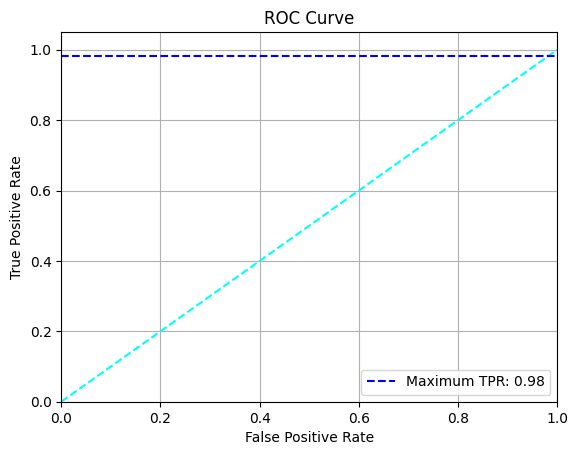

In [157]:
print(len(seqopt_FPR_list))
print_ROC_curve(seqopt_FPR_list, seqopt_TPR_list)

### OTTENIMENTO DELLE **PREDICTION DAL TEST SET** E STUDIO DELLE PERFORMANCE

In [122]:
X_test_seq = test_df_seq['E-value'].to_numpy()
y_test_seq = test_df_seq['Etichetta'].to_numpy()

In [145]:
seqT_TPR_list = []
seqT_FPR_list = []

for th in [0.0001, 0.00001, 0.0000001, 0.00000001, 0.000000001, 0.0000000001, 0.00000000001, 0.000000000001, 0.0000000000001]:
  y_pred2_seq = get_preds(X_test_seq,th)
  cm = confusion_matrix(y_test_seq,y_pred2_seq)
  #print_cm(cm)
  report = classification_report(y_test_seq, y_pred2_seq, output_dict=True)
  ac, pos_f1, neg_f1, mcc = report['accuracy'], report['1']['f1-score'], report['0']['f1-score'], matthews_corrcoef(y_test_seq, y_pred2_seq)
  #print('THRESHOLD=%s\nAccuracy=%s\nPositive F1=%s\nNegative F1=%s\nMCC=%s\n'%(th,ac,pos_f1,neg_f1,mcc))
  new_res = [th, ac, pos_f1, neg_f1, mcc]
  seq_res_test.loc[len(seq_res_test)] = new_res
  seqT_TPR_current = TP / (TP + FN)
  seqT_FPR_current = FP / (FP + TN)
  seqT_TPR_list.append(seqT_TPR_current)
  seqT_FPR_list.append(seqT_FPR_current)

In [146]:
print(seq_res_test)
#seq_res_df.to_excel('Risultati.xlsx',index=False)

       Threshold  Accuracy  Pos_f1_score  Neg_f1_score       MCC
0   1.000000e-04  0.999937      0.952128      0.999968  0.953191
1   1.000000e-05  0.999986      0.988950      0.999993  0.989004
2   1.000000e-07  1.000000      1.000000      1.000000  1.000000
3   1.000000e-08  0.999996      0.997199      0.999998  0.997201
4   1.000000e-09  0.999989      0.991549      0.999995  0.991579
5   1.000000e-10  0.999989      0.991549      0.999995  0.991579
6   1.000000e-11  0.999989      0.991549      0.999995  0.991579
7   1.000000e-12  0.999989      0.991549      0.999995  0.991579
8   1.000000e-13  0.999989      0.991549      0.999995  0.991579
9   1.000000e-04  0.999937      0.952128      0.999968  0.953191
10  1.000000e-05  0.999986      0.988950      0.999993  0.989004
11  1.000000e-07  1.000000      1.000000      1.000000  1.000000
12  1.000000e-08  0.999996      0.997199      0.999998  0.997201
13  1.000000e-09  0.999989      0.991549      0.999995  0.991579
14  1.000000e-10  0.99998

9


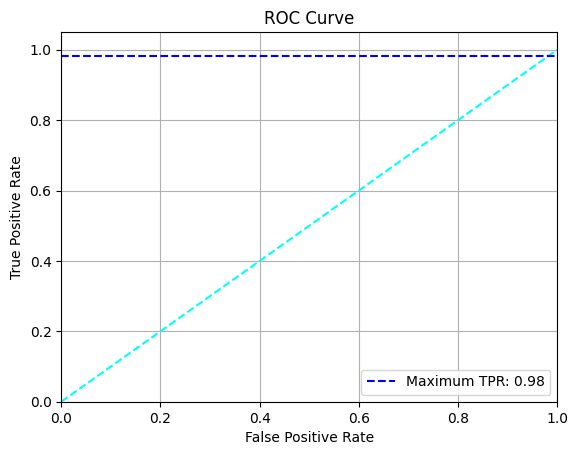

In [149]:
print(len(seqopt_FPR_list))
print_ROC_curve(seqopt_FPR_list, seqopt_TPR_list)

# **STRUCTURE ALIGNMENT**

### CARICAMENTO DELL'OPTIMIZATION SET E CREAZIONE DEL DATAFRAME

In [125]:
#opt_set_str = files.upload()
#scegliere set_1_r1.txt

In [126]:
#for file_name, content in opt_set_str.items():
#  opt_df_str = pd.read_csv(file_name, sep='\t', header=None, names=['ID_proteina', 'E-value', 'Etichetta'])

In [127]:
opt_df_str = pd.read_csv('set_1_r1.txt', sep='\t', header=None, names=['ID_proteina', 'E-value', 'Etichetta'])

In [128]:
opt_df_str.shape

(285624, 3)

### CARICAMENTO DEL TEST SET E CREAZIONE DEL DATAFRAME

In [ ]:
#test_set_str = files.upload()
#scegliere set_2_r1.txt

In [ ]:
#for file_name, content in test_set_str.items():
#  test_df_str = pd.read_csv(file_name, sep='\t', header=None, names=['ID_proteina', 'E-value', 'Etichetta'])

In [130]:
test_df_str = pd.read_csv('set_2_r1.txt', sep='\t', header=None, names=['ID_proteina', 'E-value', 'Etichetta'])

In [131]:
test_df_str.shape

(285625, 3)

###CREAZIONE DELLA TABELLA DEI RISULTATI

In [132]:
cols = ['Threshold','Accuracy','Pos_f1_score','Neg_f1_score','MCC']
str_res_opt = pd.DataFrame(columns=cols)
str_res_test = pd.DataFrame(columns=cols)

### OTTENIMENTO DELLE **PREDICTION DALL'OPTIMIZATION SET** E STUDIO DELLE PERFORMANCE

In [133]:
X_opt_str = opt_df_str['E-value'].to_numpy()
y_opt_str = opt_df_str['Etichetta'].to_numpy()

In [134]:
for th in [0.0001, 0.00001, 0.0000001, 0.00000001, 0.000000001, 0.0000000001, 0.00000000001, 0.000000000001, 0.0000000000001]:
  y_pred1_str = get_preds(X_opt_str,th)
  cm = confusion_matrix(y_opt_str,y_pred1_str)
  #print_cm(cm)
  report = classification_report(y_opt_str, y_pred1_str, output_dict=True)
  ac, pos_f1, neg_f1, mcc = report['accuracy'], report['1']['f1-score'], report['0']['f1-score'], matthews_corrcoef(y_opt_str, y_pred1_str)
  #print('THRESHOLD=%s\nAccuracy=%s\nPositive F1=%s\nNegative F1=%s\nMCC=%s\n'%(th,ac,pos_f1,neg_f1,mcc))
  new_res = [th, ac, pos_f1, neg_f1, mcc]
  str_res_opt.loc[len(str_res_opt)] = new_res


In [135]:
print(str_res_opt)

      Threshold  Accuracy  Pos_f1_score  Neg_f1_score       MCC
0  1.000000e-04  0.999912      0.934726      0.999956  0.936683
1  1.000000e-05  0.999975      0.980822      0.999988  0.980990
2  1.000000e-07  0.999989      0.991643      0.999995  0.991642
3  1.000000e-08  0.999993      0.994382      0.999996  0.994394
4  1.000000e-09  0.999993      0.994382      0.999996  0.994394
5  1.000000e-10  0.999993      0.994382      0.999996  0.994394
6  1.000000e-11  0.999993      0.994382      0.999996  0.994394
7  1.000000e-12  0.999993      0.994382      0.999996  0.994394
8  1.000000e-13  0.999989      0.991549      0.999995  0.991579


### OTTENIMENTO DELLE **PREDICTION DAL TEST SET** E STUDIO DELLE PERFORMANCE

In [136]:
X_test_str = test_df_str['E-value'].to_numpy()
y_test_str = test_df_str['Etichetta'].to_numpy()

In [137]:
for th in [0.0001, 0.00001, 0.0000001, 0.00000001, 0.000000001, 0.0000000001, 0.00000000001, 0.000000000001, 0.0000000000001]:
  y_pred2_str = get_preds(X_test_str,th)
  cm = confusion_matrix(y_test_str,y_pred2_str)
  #print_cm(cm)
  report = classification_report(y_test_str, y_pred2_str, output_dict=True)
  ac, pos_f1, neg_f1, mcc = report['accuracy'], report['1']['f1-score'], report['0']['f1-score'], matthews_corrcoef(y_test_str, y_pred2_str)
  #print('THRESHOLD=%s\nAccuracy=%s\nPositive F1=%s\nNegative F1=%s\nMCC=%s\n'%(th,ac,pos_f1,neg_f1,mcc))
  new_res = [th, ac, pos_f1, neg_f1, mcc]
  str_res_test.loc[len(str_res_test)] = new_res

In [138]:
print(str_res_test)

      Threshold  Accuracy  Pos_f1_score  Neg_f1_score       MCC
0  1.000000e-04  0.999944      0.957219      0.999972  0.958070
1  1.000000e-05  0.999989      0.991690      0.999995  0.991719
2  1.000000e-07  1.000000      1.000000      1.000000  1.000000
3  1.000000e-08  0.999996      0.997199      0.999998  0.997201
4  1.000000e-09  0.999996      0.997199      0.999998  0.997201
5  1.000000e-10  0.999993      0.994382      0.999996  0.994394
6  1.000000e-11  0.999989      0.991549      0.999995  0.991579
7  1.000000e-12  0.999989      0.991549      0.999995  0.991579
8  1.000000e-13  0.999986      0.988701      0.999993  0.988757


# **REINDIRIZZAMENTO DEI RISULTATI**

In [139]:
with pd.ExcelWriter('Results.xlsx') as writer:
    # Salvare ogni DataFrame in un foglio Excel separato
    seq_res_opt.to_excel(writer, sheet_name='Sequence alignment optimization set results', index=False)
    seq_res_test.to_excel(writer, sheet_name='Sequence alignment test set results', index=False)
    str_res_opt.to_excel(writer, sheet_name='Structure alignment optimization set results', index=False)
    str_res_test.to_excel(writer, sheet_name='Structure alignment test set result', index=False)

/usr/local/lib/python3.10/dist-packages/openpyxl/workbook/child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
